In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Initialize the training and validation generators

train_dir = 'data/train'
test_dir = 'data/test'
train_datagenerator = ImageDataGenerator(rescale=1./255)
test_datagenerator = ImageDataGenerator(rescale=1./255)

train_generator = train_datagenerator.flow_from_directory(
        train_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

test_generator = test_datagenerator.flow_from_directory(
        test_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [3]:
# Building the CNN architecture
# with four conv2D layers, two dense layers and one flatten layer

recognition_model = Sequential()

recognition_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
recognition_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
recognition_model.add(MaxPooling2D(pool_size=(2, 2)))
recognition_model.add(Dropout(0.25))

recognition_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
recognition_model.add(MaxPooling2D(pool_size=(2, 2)))
recognition_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
recognition_model.add(MaxPooling2D(pool_size=(2, 2)))
recognition_model.add(Dropout(0.25))

recognition_model.add(Flatten())
recognition_model.add(Dense(1024, activation='relu'))
recognition_model.add(Dropout(0.5))
recognition_model.add(Dense(7, activation='softmax'))

In [4]:
recognition_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                    

In [5]:
# Disable OpenCL

cv2.ocl.setUseOpenCL(False)

In [6]:
 #Compile Model

recognition_model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.0001),metrics=['accuracy'])

In [7]:
# Train the model

recognition_model_info = recognition_model.fit(
        train_generator,
        steps_per_epoch=28709 // 64,
        epochs=10,
        validation_data=test_generator,
        validation_steps=7178 // 64)

Epoch 1/10
448/448 [==============================] - 1693s 4s/step - loss: 1.8054 - accuracy: 0.2581 - val_loss: 1.7206 - val_accuracy: 0.3291
Epoch 2/10
448/448 [==============================] - 1247s 3s/step - loss: 1.6381 - accuracy: 0.3586 - val_loss: 1.5545 - val_accuracy: 0.4135
Epoch 3/10
448/448 [==============================] - 1146s 3s/step - loss: 1.5325 - accuracy: 0.4085 - val_loss: 1.4671 - val_accuracy: 0.4457
Epoch 4/10
448/448 [==============================] - 1132s 3s/step - loss: 1.4597 - accuracy: 0.4400 - val_loss: 1.4083 - val_accuracy: 0.4605
Epoch 5/10
448/448 [==============================] - 1120s 2s/step - loss: 1.3943 - accuracy: 0.4690 - val_loss: 1.3630 - val_accuracy: 0.4849
Epoch 6/10
448/448 [==============================] - 1137s 3s/step - loss: 1.3474 - accuracy: 0.4891 - val_loss: 1.3123 - val_accuracy: 0.4989
Epoch 7/10
448/448 [==============================] - 1071s 2s/step - loss: 1.3053 - accuracy: 0.5049 - val_loss: 1.2747 - val_accuracy:

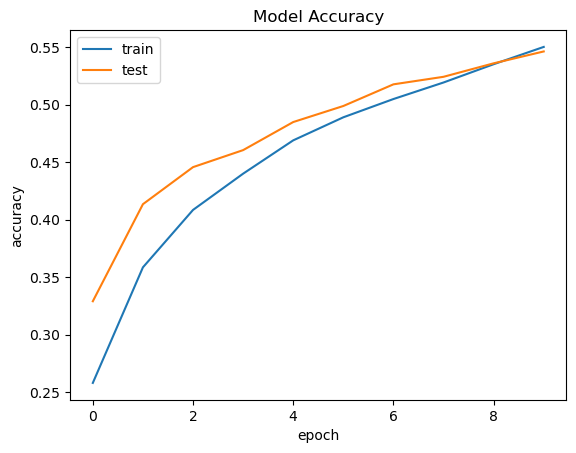

In [8]:
plt.title('Model Accuracy')
plt.plot(recognition_model_info.history['accuracy'])
plt.plot(recognition_model_info.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

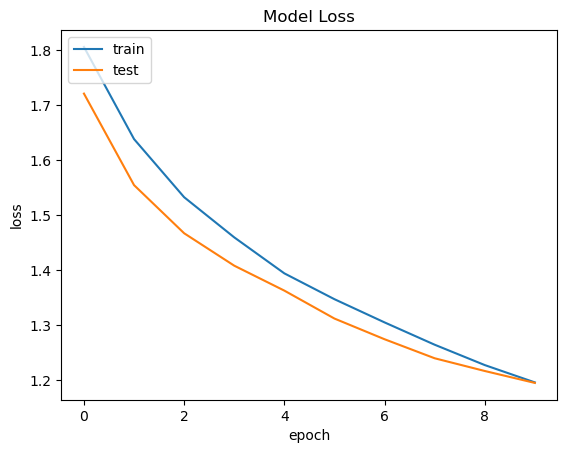

In [9]:
# Summarize history for loss

plt.title('Model Loss')
plt.plot(recognition_model_info.history['loss'])
plt.plot(recognition_model_info.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()